## Rozwiązywanie równań różniczkowych metodami algebry liniowej 

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 




In [0]:
import numpy as np
from scipy.linalg import norm
import math
import matplotlib.pyplot as plt
N = 10


def solve_chebyshev(A, b, iter_num, l_max, l_min, eps):
    d = (l_max + l_min) / 2
    c = (l_max - l_min) / 2
    preCond = np.identity(2)
    x = np.zeros(N**2)
    r = np.matmul(A, x)
    r = b - r
    iter_count = 0

    for i in range(1, iter_num + 1):
        iter_count+=1
        z = np.linalg.solve(A, r)
        alpha = 1
        if i == 1:
            p = z
            alpha = 1 / d
        elif (i == 2):
            beta = (1 / 2) * (c * alpha) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        else:
            beta = (c * alpha / 2) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        x = x + alpha * p
        r = np.matmul(A, x)
        r = b - r
        if norm(r) < eps:
            return [x, iter_count]
    return [x, iter_count]

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = \frac{x+y}{2}$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,10] \times [0,10]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe jednorodne Dirichleta: 0 na brzegach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie. 




 Nasze równanie do rozwiązania ma postać :     
$\nabla^{2}*\varphi(x,y) = - 	\rho(x,y)$    
$\rho(x,y) = \frac{x+y}{2}$ - funkcja rozkładu żródeł,      
$\nabla^{2}$ - operator Laplace'a,    
to równanie można zpisać inaczej mianowcie :   
#$\frac{\partial^{2}*\varphi(x,y)}{\partial*x^{2}}$ + $\frac{\partial^{2}*\varphi(x,y)}{\partial*y^{2}} = -\rho(x,y)$ (1)     
Warunki brzegowe Dirichleta: 0 na brzegach, czyli :      
$\rho(x,0) = 0, \rho(0,y) = 0,\rho(x,n+1) = 0, \rho(n+1,y) = 0, $     
                     
Teraz za pomocą przybliżymy pochodne w naszym równaniu różnicami skończonymi w celu zrealizowania tego zadania wprowadzamy siatke 10x10 :    
$\varphi_{i, j} = \varphi(x_{i}, y_{j}), i = 1,...10, j = 1,...10 $,   
$(x_{i}, y_{j})$ - punkty na siatce,    
h = 1 - odstęp między punktami                

Następnie wyliczymy potrzebne pochodne :                             
# $\frac{\partial*\varphi_{i,j}}{\partial*x} = \frac{\varphi_{i+1,j}-\varphi_{i-1,j}}{2h} + O(h^{2})$, (2)                       
# $\frac{\partial^{2}*\varphi_{i,j}}{\partial*x^{2}} = \frac{\varphi_{i+1,j}-2*\varphi_{i,j}+\varphi_{i-1,j}}{h^{2}} + O(h^{2})$, (3)              
# $\frac{\partial*\varphi_{i,j}}{\partial*y} = \frac{\varphi_{i,j+1}-\varphi_{i,j-1}}{2h} + O(h^{2})$, (4)                        
# $\frac{\partial^{2}*\varphi_{i,j}}{\partial*y^{2}} = \frac{\varphi_{i,j+1}-2*\varphi_{i,j}+\varphi_{i,j-1}}{h^{2}} + O(h^{2})$ (5)

Następnie podstawiamy równanie 3 oraz 5 do równanie 1, oraz po skróceniu równanie będzie miało postać : 
#$\frac{\varphi(x_{i}, y_{j-1}) + 
\varphi(x_{i-1}, y_{j}) - 
4*\varphi(x_{i}, y_{j}) +
\varphi(x_{i+1}, y_{j}) +
\varphi(x_{i}, y_{j+1})}{h^{2}} = -\rho(x,y)$ (6)


Samo budowanie siatki wygląda następująco : 
![alt text](https://drive.google.com/uc?id=1vF5oKcJ8qo0YEZxRPZRe7HczgVigXD0J)         
Dla każdego z punktów na siatce $(x_{i}, y_{j})$ nasze rowiązanie (rówanie 6), będzie zależało od 4 punktów : $(x_{i+1}, y_{j})$, $(x_{i-1}, y_{j})$, $(x_{i}, y_{j+1})$, $(x_{i}, y_{j-1})$,           
wezmy na przykład punkt $(x_{3}, y_{2})$, wartóść funkcji $\varphi$ będzia zależała od punktów $(x_{2}, y_{2})$, $(x_{3}, y_{1})$, $(x_{3}, y_{3})$, $(x_{4}, y_{2})$, a sam wzór jest pokazany na rysunku powyżej wynika on z równania (6), gdybyśmy teraz zaczęli numerować te punkty (1...100) zgodnie jak na rysunku
to możemy zauważyć że nasz punkt $(x_{3}, y_{2})$ będzie miał numer 13 i będzie zależał odpowiednio od punktów 12, 14, oraz 3 i 23 widzimy że te punkty są oddalone od siebie albo o 1 albo o 10.     
     
Następnie możemy zauważyć, że musimy policzyć dla każdego punktu z tej siatki wartośc funkcji $\varphi$ czyli mamy w naszym przypadku 100 niewiadomych ale również dla każdego punktu możemy rozpisać równanie (6), więc mamy 100 równań i 100 niewiadomych, czyli te równania możemy rozwiązać.         
 
Po powyższych rozważaniach nasze równanie w postaci macierzowej będzie wyglądało następująco : 
![alt text](https://drive.google.com/uc?id=1f2aFg4JxlKh7_nWVui1MupKCcxt2pb_H),     gdzie u nas n = 10 oraz h = 1.        
![alt text](https://drive.google.com/uc?id=1SR3f3lzNqu4xRAU3wB2BgIZN8yZiUOE5)


Nasza macież A dla pierwszych 25 punktów będzie wyglądała następująco : 

In [83]:
def create_matrix_A():
  A = np.zeros((N**2, N**2))
  for i in range(N**2):
      A[i][i] = -4
      if i - 1 >= 0: A[i-1][i] = 1.0
      if i + 1 < N**2: A[i+1][i] = 1.0
      if i - N >= 0: A[i-N][i] = 1.0
      if i + N < N**2: A[i+N][i] = 1.0
  return A


def print_matrix(A, N):
    for i in range(N):
        for j in range(N):
            print(A[i][j], " ", end='')
        print("")


A = create_matrix_A()
print_matrix(A, 25)

-4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.0  0.0  0.0  0.0  0.0  0.0  1.0  -4.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

A macież b, wygląda następująco :


In [84]:
def create_matrix_b():
    phi = lambda x, y: (x + y)/2
    b = np.zeros(N**2)
    counter = 0
    for i in range(1, N+1):
        for j in range(1, N+1):
            b[counter] = phi(j, i)
            counter += 1
    return b


b = create_matrix_b()
print(b)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  1.5  2.   2.5  3.
  3.5  4.   4.5  5.   5.5  6.   2.   2.5  3.   3.5  4.   4.5  5.   5.5
  6.   6.5  2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7.   7.5  3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5  5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.5 10. ]


#### Zadanie 3
Zastosuj do otrzymanego układu równań metody Gaussa-Seidla, SOR i Czebyszewa. Porównaj zbieżność tych metod. 

In [0]:
def gauss_siedla_solver(A, b, N, eps):
    iter_count = 0
    x = np.zeros_like(b)
    for _ in range(N):
        iter_count += 1
        x_new = np.zeros_like(x)
        for i in range(A.shape[0]):
            x_new[i] = (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

        if np.allclose(x, x_new, atol=eps, rtol=0.):
            return [x_new, iter_count]
        x = x_new
    return [x, iter_count]


def sor_solver(A, b, omega, N, eps):
    iter_count = 0
    x = np.zeros_like(b)
    if omega < 0 or omega > 2:
        print('omega should be inside (0, 2)')
        return [x, -1]
    n = b.shape
    x_new = np.zeros_like(x)
    for _ in range(N):
        iter_count += 1
        for i in range(n[0]):
            new_values_sum = np.dot(A[i, :i], x[:i])
            old_values_sum = np.dot(A[i, i + 1:], x_new[i + 1:])
            x[i] = (b[i] - (old_values_sum + new_values_sum)) / A[i, i]
            x[i] = np.dot(x[i], omega) + np.dot(x_new[i], (1 - omega))
        if np.linalg.norm(np.dot(A, x) - b) < eps:
            return [x_new, iter_count]
        x_new = x
    return [x, iter_count]

Na początku sprawdzę poprawności działania wszystkich trzech metod :

In [86]:
[res, iter_count] = solve_chebyshev(A, b, 1000, 0, 2, 1e-12)
print("Ilości iteracji dla metody czebyszewa wynosi : {}".format(iter_count))
print("Rozwiazanie :")
print(res)

Ilości iteracji dla metody czebyszewa wynosi : 1
Rozwiazanie :
[-12.38060444 -16.96024437 -19.29167572 -20.93570123 -22.34404399
 -23.634568   -24.82158505 -25.9051561  -26.95653179 -28.34429975
 -31.5621734  -34.66869733 -37.27075727 -39.60708523 -41.80590671
 -43.87264298 -45.74661611 -47.34250757 -48.57667129 -49.35849381
 -49.35509209 -50.88161427 -53.01557078 -55.41597573 -57.89985464
 -60.30348108 -62.44972884 -64.14158678 -65.14915201 -65.15791209
 -63.61808687 -63.98709688 -65.49393587 -67.64139225 -70.07405506
 -72.49169784 -74.6072314  -76.12495869 -76.72043787 -76.00591569
 -73.47224643 -72.9547505  -73.83168357 -75.58160233 -77.76327552
 -79.98202382 -81.86254023 -83.03057872 -83.10172509 -81.67306636
 -78.31023266 -77.02797512 -77.29644558 -78.59005797 -80.41542088
 -82.31058168 -83.83032698 -84.53309088 -83.98281742 -81.77439199
 -77.56764274 -75.55047172 -75.23606567 -76.0667631  -77.49776834
 -79.01455505 -80.11509514 -80.28864039 -79.02206171 -75.87404143
 -70.63547459

In [87]:
[res, iter_count] = gauss_siedla_solver(A, b, 1000, 1e-12)
print("Ilości iteracji dla metody Gaussa-Seidla wynosi : {}".format(iter_count))
print("Rozwiązanie :")
print(res)

Ilości iteracji dla metody Gaussa-Seidla wynosi : 686
Rozwiązanie :
[-12.38060444 -16.96024437 -19.29167572 -20.93570123 -22.34404399
 -23.634568   -24.82158505 -25.9051561  -26.95653179 -28.34429975
 -31.5621734  -34.66869733 -37.27075727 -39.60708523 -41.80590671
 -43.87264298 -45.74661611 -47.34250757 -48.57667129 -49.35849381
 -49.35509209 -50.88161427 -53.01557078 -55.41597573 -57.89985464
 -60.30348108 -62.44972884 -64.14158678 -65.14915201 -65.15791209
 -63.61808687 -63.98709688 -65.49393587 -67.64139225 -70.07405506
 -72.49169784 -74.6072314  -76.12495869 -76.72043787 -76.00591569
 -73.47224643 -72.9547505  -73.83168357 -75.58160233 -77.76327552
 -79.98202382 -81.86254023 -83.03057872 -83.10172509 -81.67306636
 -78.31023266 -77.02797512 -77.29644558 -78.59005797 -80.41542088
 -82.31058168 -83.83032698 -84.53309088 -83.98281742 -81.77439199
 -77.56764274 -75.55047172 -75.23606567 -76.0667631  -77.49776834
 -79.01455505 -80.11509514 -80.28864039 -79.02206171 -75.87404143
 -70.635

In [88]:
[res, iter_count] = sor_solver(A, b, 1.2, 1000, 1e-12)
print("Ilości iteracji dla metody SOR wynosi : {}".format(iter_count))
print("Rozwiązanie :")
print(res)

Ilości iteracji dla metody SOR wynosi : 749
Rozwiązanie :
[-12.38060444 -16.96024437 -19.29167572 -20.93570123 -22.34404399
 -23.634568   -24.82158505 -25.9051561  -26.95653179 -28.34429975
 -31.5621734  -34.66869733 -37.27075727 -39.60708523 -41.80590671
 -43.87264298 -45.74661611 -47.34250757 -48.57667129 -49.35849381
 -49.35509209 -50.88161427 -53.01557078 -55.41597573 -57.89985464
 -60.30348108 -62.44972884 -64.14158678 -65.14915201 -65.15791209
 -63.61808687 -63.98709688 -65.49393587 -67.64139225 -70.07405506
 -72.49169784 -74.6072314  -76.12495869 -76.72043787 -76.00591569
 -73.47224643 -72.9547505  -73.83168357 -75.58160233 -77.76327552
 -79.98202382 -81.86254023 -83.03057872 -83.10172509 -81.67306636
 -78.31023266 -77.02797512 -77.29644558 -78.59005797 -80.41542088
 -82.31058168 -83.83032698 -84.53309088 -83.98281742 -81.77439199
 -77.56764274 -75.55047172 -75.23606567 -76.0667631  -77.49776834
 -79.01455505 -80.11509514 -80.28864039 -79.02206171 -75.87404143
 -70.63547459 -67.

Wykres 2D funkcji $\varphi(x,y)$ : 

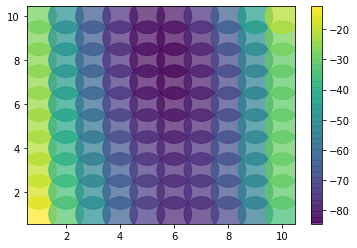

In [93]:
x = []
y = []
for i in range(1, N+1):
    for j in range(1, N+1):
        x.append(i)
        y.append(j)
sizes = [1200 for i in range(100)]

plt.scatter(x, y, c=res, sizes=sizes, alpha=0.7,
            cmap='viridis')
plt.colorbar()
plt.show()